# Tugas Uji Hipotesis


Misalkan kamu adalah data scientist di gojek. Kamu ingin mengetahui apakah kemacetan mempengaruhi tingkat kepuasan pelanggan. Jadi kamu ingin membandingkan nilai "bintang" dari customer saat dia order di jam macet dan tidak macet. (#hint = data dari customer yang sama)

macet = [2, 3, 5, 4, 5, 4, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 3, 3, 5, 4, 3, 4, 3, 4, 3, 4, 4, 5]

tidak_macet = [2, 2, 4, 5, 4, 3, 3, 3, 3, 3, 3, 4, 4, 5, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4]

1. Buat hipotesisnya
2. Lakukan uji asumsi normalitasnya
3. Jika datanya normal lakukan uji parametrik, jika tidak berdistribusi normal lakukan uji nonparametrik
4. Apa kesimpulan uji hipotesisnya?


### 1. Buat Hipotesis

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [17]:
macet = np.array([2, 3, 5, 4, 5, 4, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 3, 3, 5, 4, 3, 4, 3, 4, 3, 4, 4, 5])
tidak_macet = np.array([2, 2, 4, 5, 4, 3, 3, 3, 3, 3, 3, 4, 4, 5, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4])

### 2. Uji Normalitas

    Ho = data berdistribusi normal
    Ha = data tidak berdistribusi normal
    
    Asumsikan Rentang Kepercayaanya = 95% alpha = 5%

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

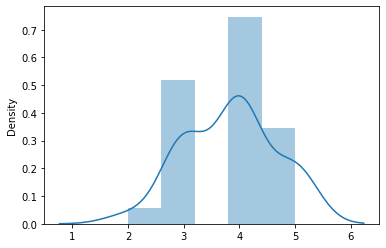

In [18]:
sns.distplot(macet)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

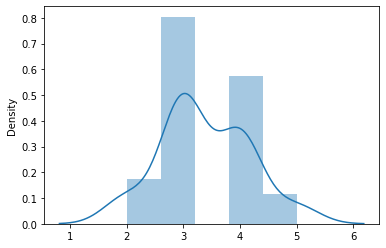

In [19]:
sns.distplot(tidak_macet)

In [20]:
#Uji Kolmogorov-Smirnov
z_score_macet = stats.zscore(macet)
z_score_tidak_macet = stats.zscore(tidak_macet)
print('uji kolmogorov smirnov data macet = ', stats.kstest(z_score_macet, "norm"))
print('uji kolmogorov smirnov data tidak macet = ', stats.kstest(z_score_tidak_macet, "norm"))

uji kolmogorov smirnov data macet =  KstestResult(statistic=0.2414618941043637, pvalue=0.056685222453497386)
uji kolmogorov smirnov data tidak macet =  KstestResult(statistic=0.2769460572882385, pvalue=0.018550502658514656)



    alpha = 0.05
    Hasil dari p-value macet       = 0.056 (>0.05) Data berdistribusi normal
    Hasil dari p-value tidak_macet = 0.018 (<0.05) Data tidak berdistribusi normal

    Karena ada nilai p-value <= 0.05, maka Ho ditolak, data tidak berdistribusi normal

### 3. Uji Wilcoxon (Non Parametrik)
    Karena data tidak berdistribusi normal, maka akan dilakukan uji beda non-parametrik wilcoxon. Dilakukan uji wilcoxon karena 2 kelompok data berhubungan yaitu macet dan tidak macet.

In [21]:
m = macet - tidak_macet
stats.wilcoxon(m)

WilcoxonResult(statistic=8.0, pvalue=0.0007891129890156299)

### 4. Kesimpulan Uji Hipotesis
    
    karena p-value = 0.0007 < 0.05, maka Ho ditolak dan Ha diterima, terdapat perbedaan yang signifikan dari nilai "bintang" customer saat order macet dan tidak macet. nilai "bintang" dari costumer saat sedang order di jam macet dan tidak macet berpengaruh